In [9]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

matplotlib.style.use('ggplot')

In [5]:
df = pd.read_csv('./Datasets/Crimes_-_2001_to_present.csv')
df.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [8]:
df.dropna(axis=0)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"
5,4651151,HM161364,02/03/2006 04:40:00 PM,001XX N LATROBE AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1141360.0,1900477.0,2006,04/15/2016 08:55:02 AM,41.882983,-87.756382,"(41.882982785, -87.756382024)"
6,4656683,HM161437,02/03/2006 04:30:00 PM,002XX W ALEXANDER ST,1651,GAMBLING,GAME/CARDS,OTHER,True,False,...,25.0,34.0,19,1174969.0,1889230.0,2006,04/15/2016 08:55:02 AM,41.851434,-87.633305,"(41.851433926, -87.633305383)"
7,4656759,HM161911,02/03/2006 08:00:00 PM,044XX N MILWAUKEE AVE,1680,GAMBLING,OTHER,ALLEY,True,False,...,45.0,15.0,19,1141580.0,1928940.0,2006,04/15/2016 08:55:02 AM,41.961084,-87.754869,"(41.961084206, -87.754869118)"
8,4657274,HM159750,02/02/2006 07:30:00 PM,084XX S PULASKI RD,1680,GAMBLING,OTHER,OTHER,True,False,...,18.0,70.0,19,1151210.0,1848126.0,2006,04/15/2016 08:55:02 AM,41.739137,-87.721580,"(41.739136801, -87.721580463)"
9,4657315,HM159804,02/02/2006 06:50:00 PM,049XX W FOSTER AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,TAVERN/LIQUOR STORE,True,False,...,45.0,12.0,19,1142277.0,1934118.0,2006,04/15/2016 08:55:02 AM,41.975280,-87.752177,"(41.975280123, -87.752177413)"


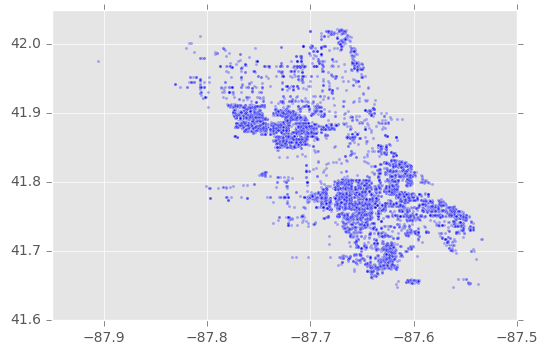

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

In [21]:
latlon = df[['Longitude', 'Latitude']]
latlon = latlon.dropna(axis=0)

Now find the centroids

In [33]:
kmeans = KMeans(n_clusters=7)
kmeans_model = kmeans.fit(latlon)

[[-87.58387599  41.75411232]
 [-87.70930063  41.87834611]
 [-87.66515813  41.77332596]
 [-87.6863993   41.98004781]
 [-87.62019415  41.8054585 ]
 [-87.63138658  41.69699508]
 [-87.75720216  41.89372277]]


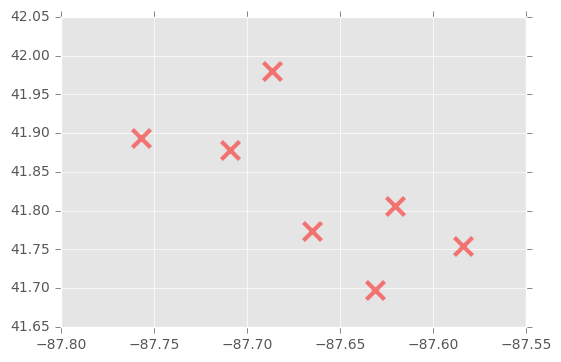

In [34]:
centroids = kmeans_model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
#ax.scatter(df.Longitude, df.Latitude, c='orange')
print(centroids)
plt.show()

In [31]:
df = df.dropna(axis=0)

In [38]:
df.Date = pd.to_datetime(df.Date, errors='coerce')
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [40]:
import datetime
new_date = datetime.datetime(2011, 1, 1)
newlatlon = df['Date'] > new_date
newlatlon = df[['Longitude', 'Latitude']]

In [41]:
newlatlon.head()

,Longitude,Latitude
0,-87.561511,41.758607
1,-87.721389,41.889909
2,-87.751710,41.894005
3,-87.767149,41.882208
4,-87.662629,41.763106


[[-87.75698576  41.89339715]
 [-87.63127937  41.69697042]
 [-87.62007551  41.80478188]
 [-87.70961388  41.87812088]
 [-87.58358012  41.7536816 ]
 [-87.68517221  41.9815098 ]
 [-87.66469231  41.77294272]]


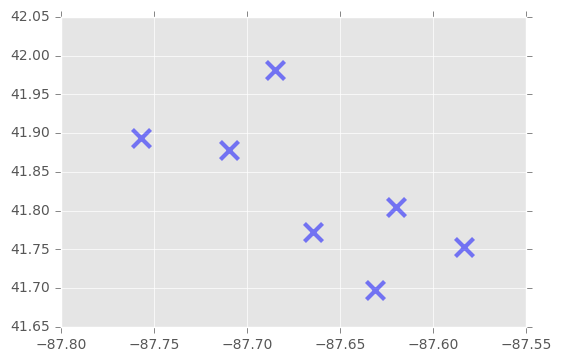

In [42]:
kmeans = KMeans(n_clusters=7)
kmeans_model = kmeans.fit(newlatlon)
centroids = kmeans_model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='blue', alpha=0.5, linewidths=3, s=169)
#ax.scatter(df.Longitude, df.Latitude, c='orange')
print(centroids)
plt.show()